# 1. Data prep

In [ ]:
import zipfile
from pathlib import Path

In [ ]:
data_path = Path("data/")
zip_path = Path("/content/pizza_steak_sushi.zip")
image_path = data_path / "pizza_steak_sushi_images"

In [ ]:
if image_path.is_dir():
  print(f"{image_path} already exists")
else:
  print(f"Creating {image_path} and extracting data")
  image_path.mkdir(parents=True, exist_ok=True)

  with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(image_path)

  print("Unzipped --")

Creating data/pizza_steak_sushi_images and extracting data
Unzipped --


In [ ]:
print(list(image_path.iterdir()))

[PosixPath('data/pizza_steak_sushi_images/test'), PosixPath('data/pizza_steak_sushi_images/train')]


In [ ]:
import os

print("Structure of our dataset: ")

for dirpath, dirnames, filenames in os.walk(image_path):

  # print(dirpath)
  # print(dirnames)
  # print(filenames)

  num_dirs = len(dirnames)
  num_files = len(filenames)

  rel_path = os.path.relpath(dirpath, data_path)
  print(f"{rel_path}/")
  print(f"   ├── {num_dirs} subfolder(s)")
  print(f"   └── {num_files} file(s)\n")

Structure of our dataset: 
pizza_steak_sushi_images/
   ├── 2 subfolder(s)
   └── 0 file(s)

pizza_steak_sushi_images/test/
   ├── 3 subfolder(s)
   └── 0 file(s)

pizza_steak_sushi_images/test/pizza/
   ├── 0 subfolder(s)
   └── 25 file(s)

pizza_steak_sushi_images/test/steak/
   ├── 0 subfolder(s)
   └── 19 file(s)

pizza_steak_sushi_images/test/sushi/
   ├── 0 subfolder(s)
   └── 31 file(s)

pizza_steak_sushi_images/train/
   ├── 3 subfolder(s)
   └── 0 file(s)

pizza_steak_sushi_images/train/pizza/
   ├── 0 subfolder(s)
   └── 78 file(s)

pizza_steak_sushi_images/train/steak/
   ├── 0 subfolder(s)
   └── 75 file(s)

pizza_steak_sushi_images/train/sushi/
   ├── 0 subfolder(s)
   └── 72 file(s)



- os.walk() recursively goes through every directory and subdirectory starting at image_path.
  - dirpath → full path of the current folder
  - dirnames → list of subfolders inside that folder
  - filenames → list of files inside that folder


- ``` rel_path = os.path.relpath(dirpath, data_path) ```
  - Converts the absolute path (dirpath) into a relative path starting from data_path.
  - This makes the printed output cleaner — instead of showing something like
    /content/data/pizza_steak_sushi/train/pizza,
    it shows just
    pizza_steak_sushi/train/pizza.



The dataset contains 300 total images across 3 food classes, with 225 for training and 75 for testing, organized neatly into class-specific subfolders - ideal for PyTorch’s ImageFolder loader.

In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi_images/train'),
 PosixPath('data/pizza_steak_sushi_images/test'))

# 2. Visualize data

In [ ]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

Selected images (path — class):
 1. data/pizza_steak_sushi_images/train/steak/165639.jpg — steak
 2. data/pizza_steak_sushi_images/train/steak/355715.jpg — steak
 3. data/pizza_steak_sushi_images/train/steak/1615395.jpg — steak
 4. data/pizza_steak_sushi_images/test/pizza/1687143.jpg — pizza
 5. data/pizza_steak_sushi_images/train/sushi/748830.jpg — sushi
 6. data/pizza_steak_sushi_images/train/pizza/29417.jpg — pizza
 7. data/pizza_steak_sushi_images/train/pizza/1649276.jpg — pizza
 8. data/pizza_steak_sushi_images/train/pizza/38349.jpg — pizza
 9. data/pizza_steak_sushi_images/train/steak/461689.jpg — steak
10. data/pizza_steak_sushi_images/train/steak/2648423.jpg — steak
11. data/pizza_steak_sushi_images/train/pizza/2451169.jpg — pizza
12. data/pizza_steak_sushi_images/train/pizza/1044789.jpg — pizza
13. data/pizza_steak_sushi_images/train/sushi/686426.jpg — sushi
14. data/pizza_steak_sushi_images/train/steak/75537.jpg — steak
15. data/pizza_steak_sushi_images/train/steak/239025.jpg

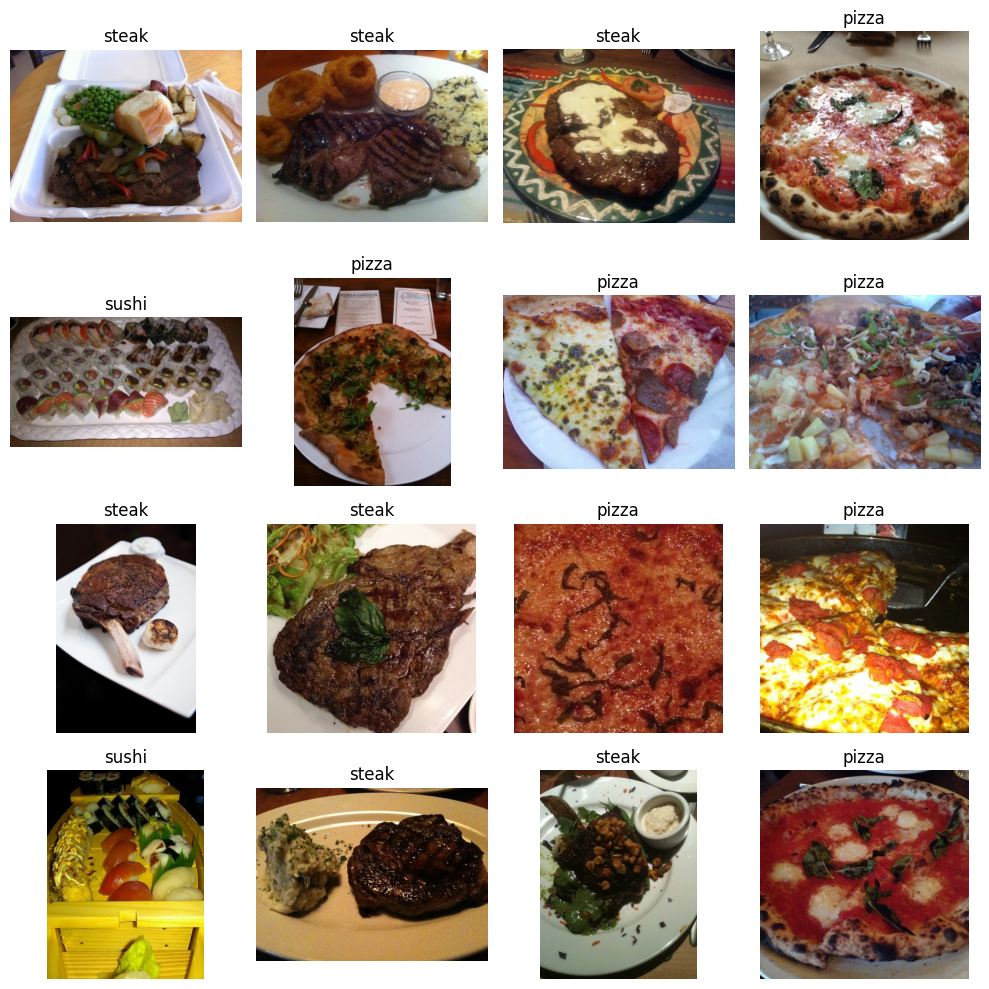

In [ ]:
image_path = Path("data/pizza_steak_sushi_images")

all_images = list(image_path.rglob("*.jpg"))

sample = random.sample(all_images, 16)

print("Selected images (path — class):")
for i, p in enumerate(sample, 1):
  cls = p.parent.name
  print(f"{i:2d}. {p} — {cls}")

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for ax, p in zip(axes, sample):
  img = Image.open(p)
  ax.imshow(img)
  ax.set_title(p.parent.name)
  ax.axis("off")

plt.tight_layout()
plt.show()

# 3. Transforming data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

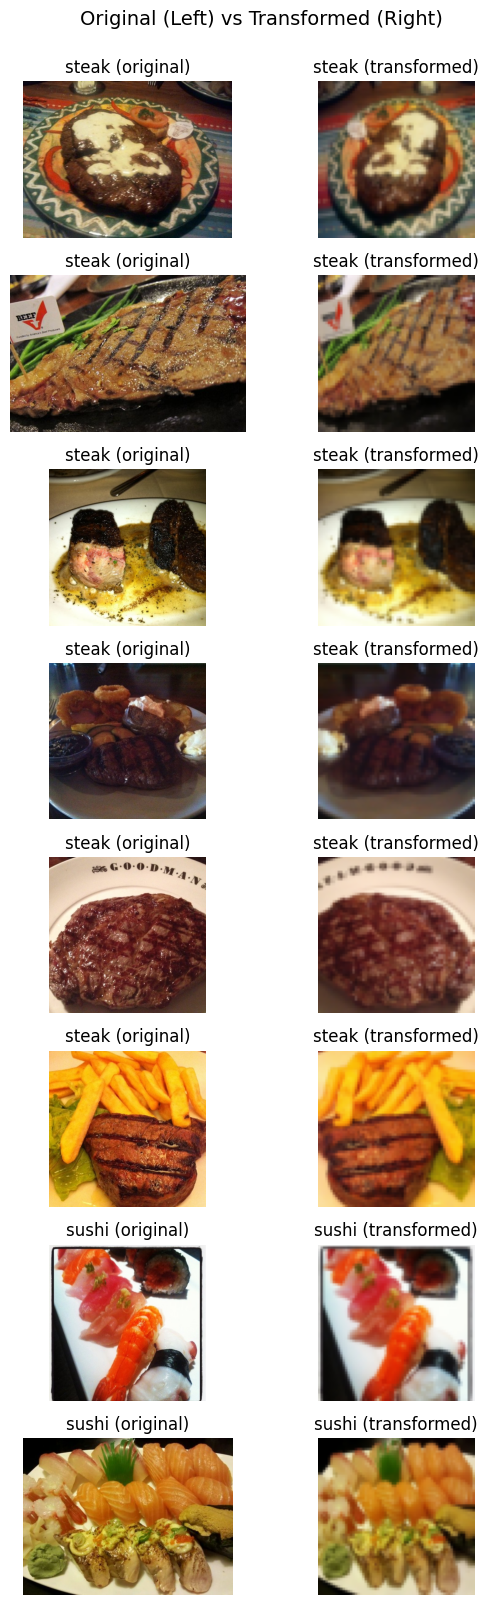

In [ ]:
all_images = list(image_path.rglob("*.jpg"))
sample = random.sample(all_images, 8)

fig, axes = plt.subplots(len(sample), 2, figsize=(6, 16))
fig.suptitle("Original (Left) vs Transformed (Right)", fontsize=14, y=1)

for i, p in enumerate(sample):
  original_img = Image.open(p).convert("RGB")
  transformed_tensor = data_transform(original_img)

  transformed_img = transforms.ToPILImage()(transformed_tensor)

  # left: original, right: transformed
  axes[i, 0].imshow(original_img)
  axes[i, 0].set_title(f"{p.parent.name} (original)")
  axes[i, 0].axis("off")

  axes[i, 1].imshow(transformed_img)
  axes[i, 1].set_title(f"{p.parent.name} (transformed)")
  axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

# 4. Loading image using `ImageFolder`

In [ ]:
from torchvision import datasets

In [ ]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform
)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi_images/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi_images/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
train_data.classes

['pizza', 'steak', 'sushi']

In [ ]:
test_data.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
class_names = train_data.classes
class_dict = train_data.class_to_idx

In [ ]:
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
class_dict_rev = {}

for key, val in class_dict.items():
  class_dict_rev[val] = key

class_dict_rev

{0: 'pizza', 1: 'steak', 2: 'sushi'}

In [ ]:
train_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [ ]:
img, label = train_data[100][0], train_data[100][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"What is image?: {class_dict_rev[label]}")

Image tensor:
tensor([[[0.8824, 0.8784, 0.8824,  ..., 0.9490, 0.9725, 0.9804],
         [0.8863, 0.8824, 0.8784,  ..., 0.9294, 0.9569, 0.9725],
         [0.8824, 0.8863, 0.8824,  ..., 0.9294, 0.9451, 0.9608],
         ...,
         [0.6706, 0.6627, 0.6588,  ..., 0.6588, 0.6588, 0.6627],
         [0.6667, 0.6627, 0.6588,  ..., 0.6627, 0.6627, 0.6980],
         [0.6706, 0.6549, 0.6588,  ..., 0.6667, 0.7020, 0.8039]],

        [[0.7765, 0.7725, 0.7686,  ..., 0.7569, 0.8000, 0.8118],
         [0.7725, 0.7686, 0.7686,  ..., 0.7490, 0.7843, 0.8039],
         [0.7686, 0.7686, 0.7686,  ..., 0.7529, 0.7765, 0.8000],
         ...,
         [0.5608, 0.5608, 0.5608,  ..., 0.5294, 0.5255, 0.5255],
         [0.5608, 0.5608, 0.5608,  ..., 0.5333, 0.5333, 0.5608],
         [0.5686, 0.5608, 0.5608,  ..., 0.5333, 0.5725, 0.6706]],

        [[0.6980, 0.7020, 0.6980,  ..., 0.6118, 0.6431, 0.6471],
         [0.7020, 0.7020, 0.6980,  ..., 0.6039, 0.6235, 0.6471],
         [0.6980, 0.6980, 0.6863,  ..., 0.60

TypeError: Invalid shape (3, 64, 64) for image data

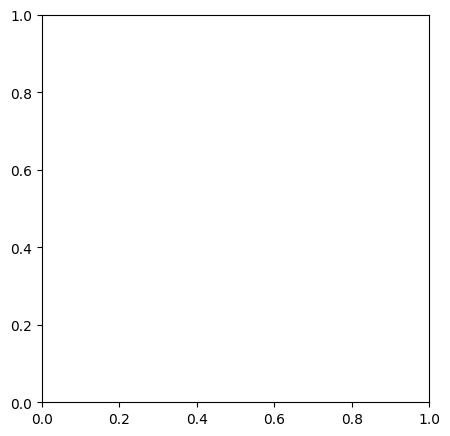

In [ ]:
plt.figure(figsize=(5, 7))
plt.imshow(img)
plt.title(class_dict_rev[label])

original shape: torch.Size([3, 64, 64])
permuted shape: torch.Size([64, 64, 3])


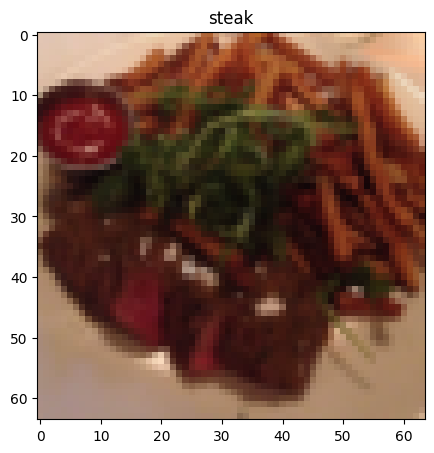

In [ ]:
plt.figure(figsize=(5, 7))
plt.imshow(img.permute(1, 2, 0))
plt.title(class_dict_rev[label])

print(f"original shape: {img.shape}")
print(f"permuted shape: {img.permute(1, 2, 0).shape}")

In [ ]:
# turn loaded images into data loaders

from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=1,
    num_workers=1,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=1,
    num_workers=1,
    shuffle=False
)

In [ ]:
train_dataloader

In [ ]:
next(iter(train_dataloader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0471,  ..., 0.0431, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0039, 0.0196,  ..., 0.0078, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
           [0.0000, 0.0039, 0.0157,  ..., 0.0118, 0.0039, 0.0000],
           ...,
           [0.0000, 0.0039, 0.0392,  ..., 0.0039, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
           [0.0078, 0.0078, 0.0078,  ..., 0.0118, 0.0078, 0.0078],
           [0.0078, 0.00

as batch size is 1, we'll get the iterator to return just one sample and its label

In [ ]:
img, label = next(iter(train_dataloader))

In [ ]:
img.shape

torch.Size([1, 3, 64, 64])

In [ ]:
label.shape

torch.Size([1])

image_tensor → shape [1, 3, H, W] (since it’s 1 image, 3 color channels)

label_tensor → e.g. tensor([0]) for pizza, tensor([1]) for steak, etc.

# 5. Model Building

## Model 0 : TinyVGG

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(
    train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [ ]:
NUM_WORKERS

2

In [ ]:
train_dataloader_simple

In [ ]:
next(iter(train_dataloader_simple))

[tensor([[[[0.5922, 0.6000, 0.6000,  ..., 0.5725, 0.5765, 0.5765],
           [0.5961, 0.6000, 0.6039,  ..., 0.5804, 0.5804, 0.5804],
           [0.6078, 0.6039, 0.6039,  ..., 0.5843, 0.5804, 0.5765],
           ...,
           [0.5176, 0.5176, 0.5176,  ..., 0.5412, 0.5490, 0.5529],
           [0.5176, 0.5137, 0.5176,  ..., 0.5451, 0.5529, 0.5608],
           [0.5137, 0.5098, 0.5098,  ..., 0.5490, 0.5608, 0.5686]],
 
          [[0.5412, 0.5412, 0.5490,  ..., 0.5804, 0.5882, 0.5961],
           [0.5490, 0.5490, 0.5529,  ..., 0.5882, 0.5922, 0.5961],
           [0.5490, 0.5529, 0.5490,  ..., 0.5882, 0.5961, 0.6000],
           ...,
           [0.4196, 0.4157, 0.4118,  ..., 0.5294, 0.5333, 0.5373],
           [0.4157, 0.4118, 0.4118,  ..., 0.5333, 0.5451, 0.5608],
           [0.4118, 0.4078, 0.4078,  ..., 0.5373, 0.5529, 0.5686]],
 
          [[0.4353, 0.4706, 0.4784,  ..., 0.5490, 0.5725, 0.6000],
           [0.4627, 0.4706, 0.4745,  ..., 0.5647, 0.5843, 0.5961],
           [0.4588, 0.46

here we see 32 samples, with its respective 32 labels as batch_size = 32

In [ ]:
from torch import nn

<h2> Overview </h2>

- **Purpose:** a tiny convolutional network inspired by the VGG family. It uses two convolutional blocks followed by a linear classifier.
- **Inputs:** images resized to **64×64** (height × width) and `input_shape` channels (`3` for RGB).
- **Outputs:** raw logits of size `output_shape` (number of classes).

---

<h2> Layer-by-layer shape tracking (single sample) </h2>

- `batch_size = N` (32),
- `input_shape = C_in = 3` (RGB),
- image spatial size `H0 = W0 = 64`,
- `hidden_units = F` (number of convolutional filters),
- `output_shape = num_classes`.

**Input tensor shape:** `(N, C_in, 64, 64)`

<h3> conv_block1 </h3>

- `nn.Conv2d(in_channels=C_in, out_channels=F, kernel_size=3, stride=1, padding=1)`
  - With `kernel_size=3`, `stride=1`, and `padding=1`, the output spatial size remains the same:
    - \[S_{out} = \left\lfloor \frac{S_{in} + 2p - (k - 1) - 1}{s} + 1 \right\rfloor\]
  - Channels become `F`.
  - Shape after conv: `(N, F, 64, 64)`
- `nn.ReLU()` → elementwise activation, same shape.
- `nn.MaxPool2d(kernel_size=2, stride=2)` → halves spatial dims:
  - Shape after pool: `(N, F, 32, 32)`

<h3> conv_block2 </h3>

- `nn.Conv2d(F, F, kernel_size=3, padding=1)` → keeps spatial size 32 × 32, channels `F`.
- `nn.ReLU()` → same shape.
- another `nn.Conv2d(F, F, kernel_size=3, padding=1)` → still `(N, F, 32, 32)`
- `nn.ReLU()` → same.
- `nn.MaxPool2d(2)` → halves spatial dims to 16 × 16:
  - Shape after conv_block2: `(N, F, 16, 16)`

<h3> classifier (flatten + linear) </h3>

- `nn.Flatten()` → flattens last three dims into one vector per sample:
  - Each sample becomes a vector of length `F * 16 * 16`.
  - That's why `in_features = hidden_units * 16 * 16` in the `Linear` layer.
- `nn.Linear(in_features=F*16*16, out_features=output_shape)` → produces logits per class.
- Final output shape: `(N, output_shape)` — ready for a loss like `nn.CrossEntropyLoss()`.

---

<h2> Why `hidden_units *  16 * 16`? </h2>

1. Start with spatial size 64×64.
2. **After conv_block1:** one `MaxPool2d(2)` reduces size to 32×32.
3. **After conv_block2:** another `MaxPool2d(2)` reduces size to 16×16.
4. The last convolution produces `hidden_units` channels (F). So the feature map for each sample is shape `(F, 16, 16)`.
5. Flattening that gives `F * 16 * 16` values per sample, hence the `in_features` value used by `nn.Linear`.

If you change the input size (e.g., 128×128), recompute accordingly: two 2×2 pools divide spatial dims by 4 total → 128 → 64 → 32, and `in_features` would be `F * 32 * 32`.

---

<h2> Example with numbers </h2>

- `batch_size = 32`, `input_shape = 3`, `hidden_units = 64`, `output_shape = 3`.
- Input batch: `(32, 3, 64, 64)`
- After conv_block1: `(32, 64, 32, 32)`
- After conv_block2: `(32, 64, 16, 16)`
- Flatten → `(32, 64*16*16)` = `(32, 16384)`
- Linear → `(32, 3)` (logits for 3 classes)


In [ ]:
class TinyVGGModel0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier(x)

    return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model0 = TinyVGGModel0(
    input_shape=3, # number of color channels for RGB
    hidden_units=12,
    output_shape=len(train_data.classes)
).to(device)

In [ ]:
model0

TinyVGGModel0(
  (conv_block1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=3, bias=True)
  )
)

In [ ]:
# test the model on a single image

imgs, labels = next(iter(train_dataloader_simple))

In [ ]:
img_one, label_one = imgs[0], labels[0]

In [ ]:
img_one.shape

torch.Size([3, 64, 64])

In [ ]:
img_one = img_one.unsqueeze(dim=0)
img_one.shape

torch.Size([1, 3, 64, 64])

In [ ]:
img_one, label_one

(tensor([[[[0.7216, 0.7451, 0.6784,  ..., 0.6549, 0.6431, 0.4706],
           [0.7137, 0.7373, 0.6745,  ..., 0.6392, 0.6353, 0.4627],
           [0.7137, 0.7333, 0.6824,  ..., 0.5725, 0.6118, 0.4549],
           ...,
           [0.3882, 0.4235, 0.4706,  ..., 0.4039, 0.4196, 0.3255],
           [0.3882, 0.4235, 0.4392,  ..., 0.4471, 0.4627, 0.3490],
           [0.3882, 0.4275, 0.4314,  ..., 0.4549, 0.4745, 0.3608]],
 
          [[0.8667, 0.9294, 0.8667,  ..., 0.7059, 0.6863, 0.5059],
           [0.8667, 0.9255, 0.8667,  ..., 0.6941, 0.6745, 0.4941],
           [0.8627, 0.9294, 0.8706,  ..., 0.6235, 0.6549, 0.4863],
           ...,
           [0.4000, 0.4392, 0.4745,  ..., 0.4196, 0.4275, 0.3294],
           [0.4039, 0.4392, 0.4471,  ..., 0.4588, 0.4745, 0.3529],
           [0.4118, 0.4471, 0.4392,  ..., 0.4667, 0.4863, 0.3647]],
 
          [[0.8784, 0.9961, 0.9961,  ..., 0.7373, 0.7098, 0.5137],
           [0.8745, 0.9922, 0.9961,  ..., 0.7255, 0.7059, 0.5098],
           [0.8745, 0.99

In [ ]:
model0.eval()

with torch.inference_mode():
  output_one = model0(img_one.to(device))

In [ ]:
output_one

tensor([[ 0.0243,  0.0111, -0.0144]], device='cuda:0')

In [ ]:
print(f"Output logits:\n{output_one}\n")
print(f"Output prediction probabilities:\n{torch.softmax(output_one, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(output_one, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_one}")

Output logits:
tensor([[ 0.0243,  0.0111, -0.0144]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3391, 0.3346, 0.3262]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
0


In [ ]:
!pip install -q torchinfo
import torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model0)

Layer (type:depth-idx)                   Param #
TinyVGGModel0                            --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       336
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-4                       1,308
│    └─ReLU: 2-5                         --
│    └─Conv2d: 2-6                       1,308
│    └─ReLU: 2-7                         --
│    └─MaxPool2d: 2-8                    --
├─Sequential: 1-3                        --
│    └─Flatten: 2-9                      --
│    └─Linear: 2-10                      9,219
Total params: 12,171
Trainable params: 12,171
Non-trainable params: 0

In [ ]:
summary(model0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel0                            [1, 3]                    --
├─Sequential: 1-1                        [1, 12, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 12, 64, 64]           336
│    └─ReLU: 2-2                         [1, 12, 64, 64]           --
│    └─MaxPool2d: 2-3                    [1, 12, 32, 32]           --
├─Sequential: 1-2                        [1, 12, 16, 16]           --
│    └─Conv2d: 2-4                       [1, 12, 32, 32]           1,308
│    └─ReLU: 2-5                         [1, 12, 32, 32]           --
│    └─Conv2d: 2-6                       [1, 12, 32, 32]           1,308
│    └─ReLU: 2-7                         [1, 12, 32, 32]           --
│    └─MaxPool2d: 2-8                    [1, 12, 16, 16]           --
├─Sequential: 1-3                        [1, 3]                    --
│    └─Flatten: 2-9                      [1, 3072]                 --
│    └─L

### model0: training function

In [ ]:
def train_step(model, dataloader, loss_fn, optimizer):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    preds = torch.argmax(y_pred, dim=1)
    train_acc += (preds == y).sum().item() / len(y)
    train_loss += loss.item()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [ ]:
len(train_dataloader_simple)

8

### model0: testing function

In [ ]:
import torch

def test_step(model, dataloader, loss_fn):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      test_loss += loss.item()

      preds = torch.argmax(y_pred, dim=1)
      test_acc += (preds == y).sum().item() / len(y)

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc

### combine both to make a train function

In [ ]:
from tqdm.auto import tqdm
import torch
from typing import Dict, Any, List

def train(model: torch.nn.Module, train_dataloader: torch.utils.data.DataLoader, test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module = torch.nn.CrossEntropyLoss(),
    epochs: int = 5,
    device: torch.device | None = None,
    verbose: bool = True
) -> Dict[str, list]:
  """
  Train and evaluate a model, collecting metrics per epoch.

  Requirements:
  - `train_step(model, dataloader, loss_fn, optimizer)` and
    `test_step(model, dataloader, loss_fn)` must be defined in the notebook
    (they should follow the signatures used earlier).

  Returns:
      results: dict with lists for 'train_loss', 'train_acc', 'test_loss', 'test_acc'
  """

  device = device or (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
  model.to(device)

  results: Dict[str, list] = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  epochs_iter = tqdm(range(epochs), desc="Epochs", leave=True)
  for epoch in epochs_iter:
    train_loss, train_acc = train_step(
        model=model,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer
    )

    test_loss, test_acc = test_step(
        model=model,
        dataloader=test_dataloader,
        loss_fn=loss_fn
    )

    t_loss = float(train_loss) if isinstance(train_loss, torch.Tensor) else float(train_loss)
    t_acc  = float(train_acc)  if isinstance(train_acc, torch.Tensor)  else float(train_acc)
    te_loss = float(test_loss) if isinstance(test_loss, torch.Tensor) else float(test_loss)
    te_acc  = float(test_acc)  if isinstance(test_acc, torch.Tensor)  else float(test_acc)

    results["train_loss"].append(t_loss)
    results["train_acc"].append(t_acc)
    results["test_loss"].append(te_loss)
    results["test_acc"].append(te_acc)

    epochs_iter.set_postfix({
        "train_loss": f"{t_loss:.4f}",
        "train_acc":  f"{t_acc:.4f}",
        "test_loss":  f"{te_loss:.4f}",
        "test_acc":   f"{te_acc:.4f}"
    })

    if verbose:
        tqdm.write(
            f"Epoch {epoch+1}/{epochs} | "
            f"train_loss: {t_loss:.4f} | train_acc: {t_acc:.4f} | "
            f"test_loss: {te_loss:.4f} | test_acc: {te_acc:.4f}"
        )

  return results

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(), lr=0.001)

In [ ]:
model0_results = train(
    model=model0,
    train_dataloader=train_dataloader_simple,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=10
)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 | train_loss: 0.8683 | train_acc: 0.5625 | test_loss: 1.1409 | test_acc: 0.4129
Epoch 2/10 | train_loss: 0.8167 | train_acc: 0.5898 | test_loss: 1.0002 | test_acc: 0.4527
Epoch 3/10 | train_loss: 0.7740 | train_acc: 0.7031 | test_loss: 0.9949 | test_acc: 0.5152
Epoch 4/10 | train_loss: 0.6864 | train_acc: 0.6992 | test_loss: 1.1900 | test_acc: 0.4034
Epoch 5/10 | train_loss: 0.7244 | train_acc: 0.7305 | test_loss: 1.1541 | test_acc: 0.3930
Epoch 6/10 | train_loss: 0.6726 | train_acc: 0.7148 | test_loss: 0.9934 | test_acc: 0.5350
Epoch 7/10 | train_loss: 0.7534 | train_acc: 0.6133 | test_loss: 1.1349 | test_acc: 0.5038
Epoch 8/10 | train_loss: 0.9904 | train_acc: 0.5898 | test_loss: 1.0939 | test_acc: 0.4328
Epoch 9/10 | train_loss: 0.6329 | train_acc: 0.7617 | test_loss: 1.1290 | test_acc: 0.4025
Epoch 10/10 | train_loss: 0.6995 | train_acc: 0.6328 | test_loss: 1.0735 | test_acc: 0.4337


### model0: plot loss and accuracy curves

In [ ]:
model0_results

{'train_loss': [0.8683374598622322,
  0.8166894167661667,
  0.7739546112716198,
  0.686406034976244,
  0.7243957221508026,
  0.6726397350430489,
  0.7534164413809776,
  0.9903507120907307,
  0.6329190284013748,
  0.6994676738977432],
 'train_acc': [0.5625,
  0.58984375,
  0.703125,
  0.69921875,
  0.73046875,
  0.71484375,
  0.61328125,
  0.58984375,
  0.76171875,
  0.6328125],
 'test_loss': [1.1409204403559368,
  1.0001745422681172,
  0.9948610862096151,
  1.1899906794230144,
  1.1541185180346172,
  0.9933608174324036,
  1.1349373658498128,
  1.0938758850097656,
  1.1290004253387451,
  1.0735359191894531],
 'test_acc': [0.4128787878787879,
  0.45265151515151514,
  0.5151515151515151,
  0.4034090909090909,
  0.39299242424242425,
  0.5350378787878788,
  0.5037878787878788,
  0.43276515151515155,
  0.40246212121212127,
  0.43371212121212127]}

In [ ]:
def plot_curves(results: dict):
  epochs = range(1, len(results["train_loss"]) + 1)

  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, results["train_loss"], label="Train Loss")
  plt.plot(epochs, results["test_loss"], label="Test Loss")
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(True, linestyle="--", alpha=0.6)

  plt.subplot(1, 2, 2)
  plt.plot(epochs, results["train_acc"], label="Train Accuracy")
  plt.plot(epochs, results["test_acc"], label="Test Accuracy")
  plt.title("Accuracy Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True, linestyle="--", alpha=0.6)

  plt.tight_layout()
  plt.show()

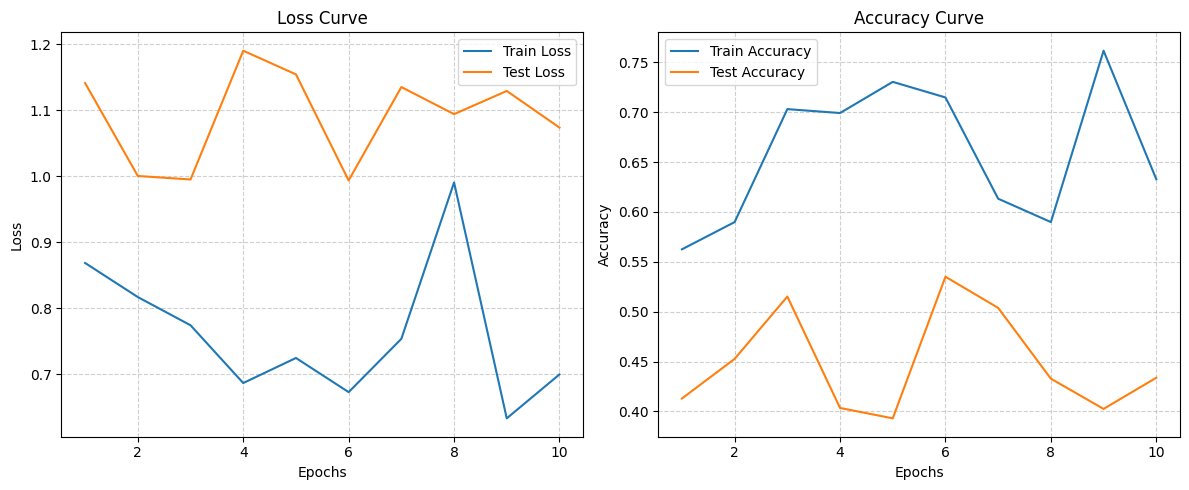

In [ ]:
plot_curves(model0_results)

## Model 1 : TinyVGG with data augmentation

In [ ]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi_images/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi_images/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

In [ ]:
train_dataloader_augmented = DataLoader(
    train_data_augmented,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_augmented = DataLoader(
    test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

In [ ]:
train_dataloader_augmented, test_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x7d2f31382540>,
 <torch.utils.data.dataloader.DataLoader at 0x7d2f2b45ae10>)

In [ ]:
model1 = TinyVGGModel0(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)

In [ ]:
model1

TinyVGGModel0(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer_fn = torch.optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
model1_results = train(
    model=model1,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_augmented,
    optimizer=optimizer_fn,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=10
)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 | train_loss: 1.0856 | train_acc: 0.3906 | test_loss: 1.1240 | test_acc: 0.3598
Epoch 2/10 | train_loss: 1.1524 | train_acc: 0.3047 | test_loss: 1.1036 | test_acc: 0.3400
Epoch 3/10 | train_loss: 1.1098 | train_acc: 0.2852 | test_loss: 1.0892 | test_acc: 0.3826
Epoch 4/10 | train_loss: 1.0923 | train_acc: 0.2812 | test_loss: 1.0784 | test_acc: 0.3087
Epoch 5/10 | train_loss: 1.1120 | train_acc: 0.3203 | test_loss: 1.1025 | test_acc: 0.3201
Epoch 6/10 | train_loss: 1.0763 | train_acc: 0.3281 | test_loss: 1.1117 | test_acc: 0.3419
Epoch 7/10 | train_loss: 1.1194 | train_acc: 0.3984 | test_loss: 1.0791 | test_acc: 0.4214
Epoch 8/10 | train_loss: 1.0664 | train_acc: 0.5117 | test_loss: 1.0609 | test_acc: 0.4432
Epoch 9/10 | train_loss: 1.0533 | train_acc: 0.5156 | test_loss: 1.0458 | test_acc: 0.4432
Epoch 10/10 | train_loss: 1.0374 | train_acc: 0.5234 | test_loss: 1.0142 | test_acc: 0.5445


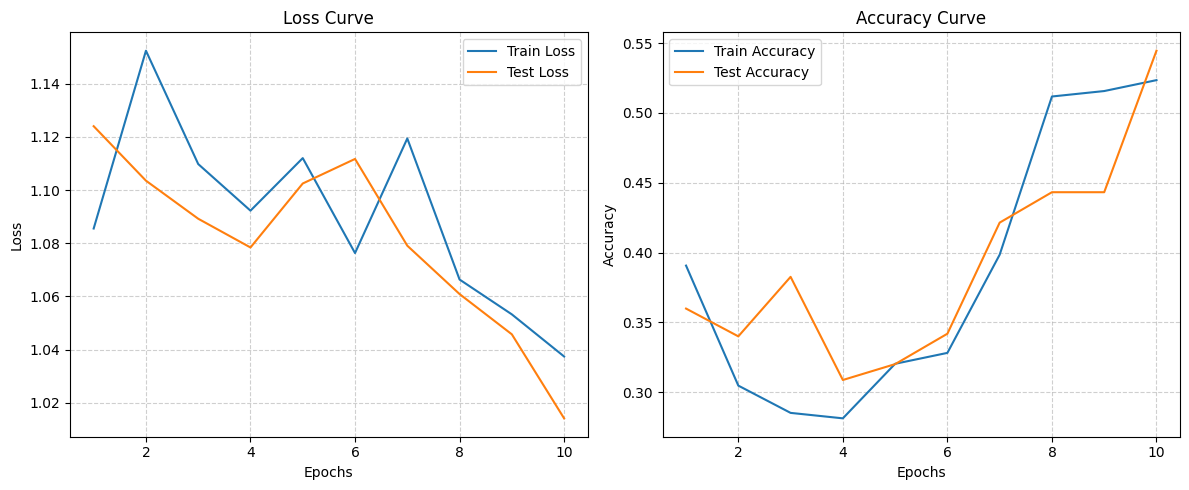

In [ ]:
plot_curves(model1_results)

## compare model0 vs model1

In [ ]:
import pandas as pd

In [ ]:
model0_df = pd.DataFrame(model0_results)
model1_df = pd.DataFrame(model1_results)

In [ ]:
model1_df

,train_loss,train_acc,test_loss,test_acc
0,1.085559,0.390625,1.124042,0.359848
1,1.152437,0.304688,1.103554,0.339962
2,1.109806,0.285156,1.089237,0.382576
3,1.092273,0.281250,1.078426,0.308712
4,1.112045,0.320312,1.102495,0.320076
5,1.076329,0.328125,1.111727,0.341856
6,1.119430,0.398438,1.079100,0.421402
7,1.066372,0.511719,1.060907,0.443182
8,1.053270,0.515625,1.045765,0.443182
9,1.037424,0.523438,1.014159,0.544508


In [ ]:
model0_df

,train_loss,train_acc,test_loss,test_acc
0,0.868337,0.562500,1.140920,0.412879
1,0.816689,0.589844,1.000175,0.452652
2,0.773955,0.703125,0.994861,0.515152
3,0.686406,0.699219,1.189991,0.403409
4,0.724396,0.730469,1.154119,0.392992
5,0.672640,0.714844,0.993361,0.535038
6,0.753416,0.613281,1.134937,0.503788
7,0.990351,0.589844,1.093876,0.432765
8,0.632919,0.761719,1.129000,0.402462
9,0.699468,0.632812,1.073536,0.433712


## Model 2: Improved VGG

In [ ]:
class TinyVGGModel2(nn.Module):
  def __init__(self, input_channels: int, hidden_units: int, output_shape: int, dropout: float = 0.25):
    super().__init__()
    # Conv block 1
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(input_channels, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)  # -> 64x64  -> 32x32
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units * 2, kernel_size=3, padding=1),
        nn.BatchNorm2d(hidden_units * 2),
        nn.ReLU(inplace=True),
        nn.Conv2d(hidden_units * 2, hidden_units * 2, kernel_size=3, padding=1),
        nn.BatchNorm2d(hidden_units * 2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)  # -> 32x32 -> 16x16
    )

    # self.conv_block3 = nn.Sequential(
    #     nn.Conv2d(hidden_units*2, hidden_units*4, kernel_size=3, padding=1),
    #     nn.BatchNorm2d(hidden_units*4),
    #     nn.ReLU(inplace=True),
    #     nn.MaxPool2d(2)  # -> 8x8
    # )

    # Global pooling -> small classifier
    self.pool = nn.AdaptiveAvgPool2d((1, 1))  # (N, C, 1, 1)
    self.classifier = nn.Sequential(
        nn.Flatten(),                # -> (N, C)
        nn.Dropout(dropout),
        nn.Linear(hidden_units * 2, output_shape)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    # x = self.conv_block3(x)
    x = self.pool(x)
    x = self.classifier(x)
    return x

In [ ]:
model2 = TinyVGGModel2(input_channels=3, hidden_units=16, output_shape=3).to(device)

In [ ]:
model2

TinyVGGModel2(
  (conv_block1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.25, inplace=False)
    (2): Linear(in

In [ ]:
from torchinfo import summary
summary(model2, input_size=(8, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel2                            [8, 3]                    --
├─Sequential: 1-1                        [8, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [8, 16, 64, 64]           448
│    └─BatchNorm2d: 2-2                  [8, 16, 64, 64]           32
│    └─ReLU: 2-3                         [8, 16, 64, 64]           --
│    └─MaxPool2d: 2-4                    [8, 16, 32, 32]           --
├─Sequential: 1-2                        [8, 32, 16, 16]           --
│    └─Conv2d: 2-5                       [8, 32, 32, 32]           4,640
│    └─BatchNorm2d: 2-6                  [8, 32, 32, 32]           64
│    └─ReLU: 2-7                         [8, 32, 32, 32]           --
│    └─Conv2d: 2-8                       [8, 32, 32, 32]           9,248
│    └─BatchNorm2d: 2-9                  [8, 32, 32, 32]           64
│    └─ReLU: 2-10                        [8, 32, 32, 32]           --
│    └─M

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer_fn = torch.optim.Adam(model2.parameters(), lr=0.001)

In [ ]:
model1_results = train(
    model=model1,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_augmented,
    optimizer=optimizer_fn,
    loss_fn=loss_fn,
    epochs=10
)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 | train_loss: 1.0390 | train_acc: 0.3672 | test_loss: 1.0248 | test_acc: 0.4650
Epoch 2/10 | train_loss: 1.0739 | train_acc: 0.3867 | test_loss: 1.0301 | test_acc: 0.5047
Epoch 3/10 | train_loss: 0.9890 | train_acc: 0.5156 | test_loss: 1.0098 | test_acc: 0.5246
Epoch 4/10 | train_loss: 1.0183 | train_acc: 0.5039 | test_loss: 1.0251 | test_acc: 0.4848
Epoch 5/10 | train_loss: 1.0146 | train_acc: 0.4062 | test_loss: 1.0043 | test_acc: 0.5047
Epoch 6/10 | train_loss: 1.0422 | train_acc: 0.3984 | test_loss: 1.0043 | test_acc: 0.4848
Epoch 7/10 | train_loss: 1.0153 | train_acc: 0.5039 | test_loss: 1.0390 | test_acc: 0.4650
Epoch 8/10 | train_loss: 1.0463 | train_acc: 0.4023 | test_loss: 1.0026 | test_acc: 0.5047
Epoch 9/10 | train_loss: 1.0405 | train_acc: 0.3516 | test_loss: 0.9790 | test_acc: 0.5445
Epoch 10/10 | train_loss: 1.0073 | train_acc: 0.5039 | test_loss: 0.9925 | test_acc: 0.5445


# 6. Make Predictions

## predictions on test data

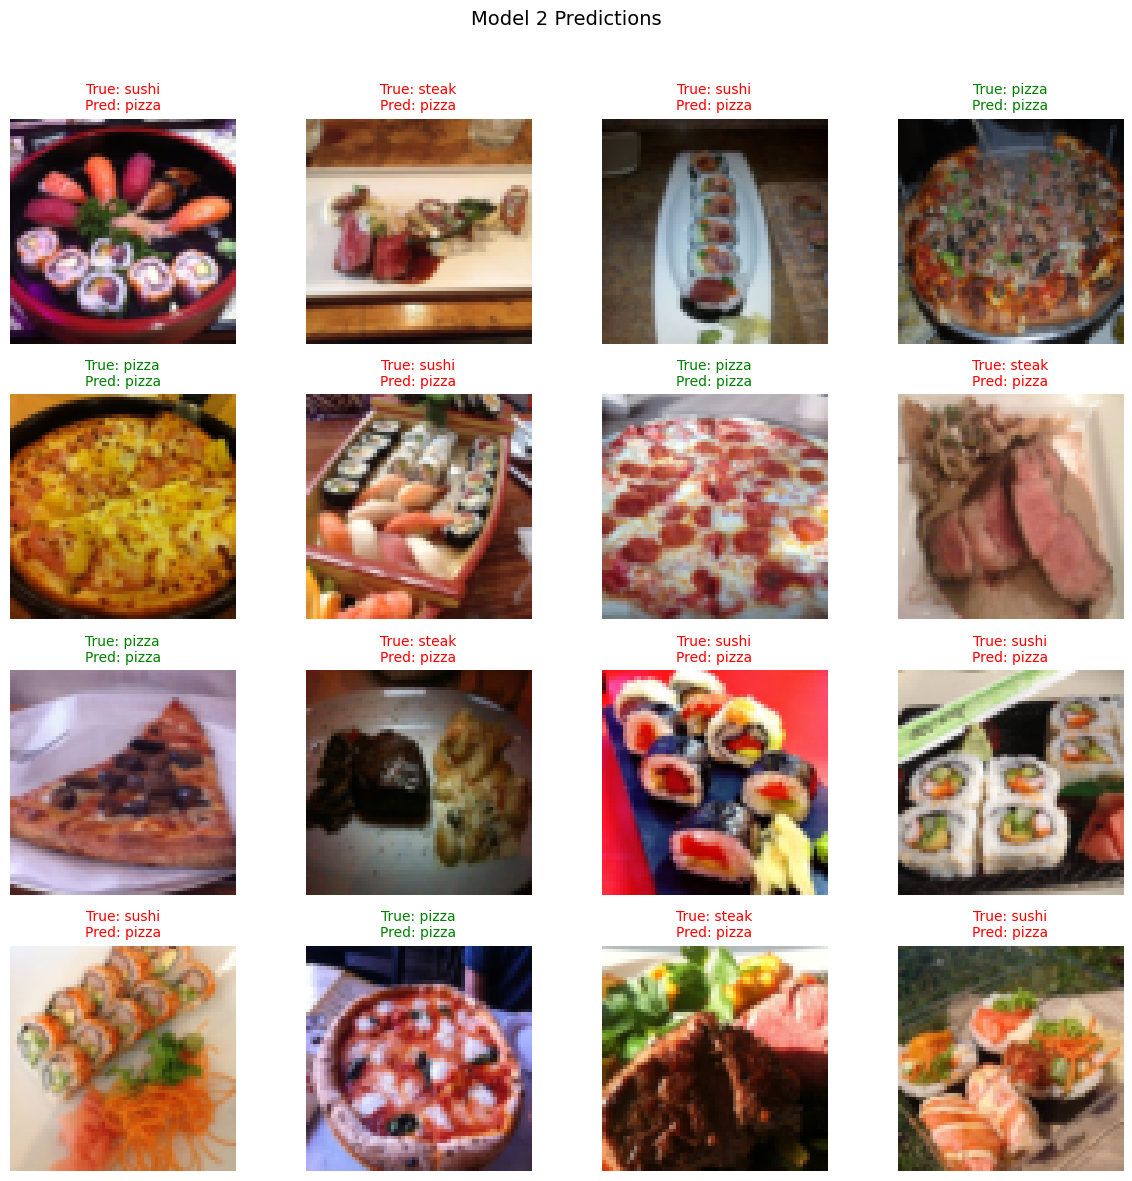

In [ ]:
from torchvision.transforms import ToPILImage

model2.eval()
model2.to(device)

X_batch, y_batch = next(iter(test_dataloader_augmented))  # a batch of images + labels
X_batch, y_batch = X_batch.to(device), y_batch.to(device)

with torch.inference_mode():
  y_pred_logits = model2(X_batch)
  y_pred = torch.argmax(y_pred_logits, dim=1)

X_batch = X_batch.cpu()
y_batch = y_batch.cpu()
y_pred = y_pred.cpu()

class_names = test_data_simple.classes

N = min(16, len(X_batch))
to_pil = ToPILImage()

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for i, ax in enumerate(axes[:N]):
  img = to_pil(X_batch[i])
  true_label = class_names[y_batch[i]]
  pred_label = class_names[y_pred[i]]
  correct = (y_batch[i] == y_pred[i])
  color = "green" if correct else "red"

  ax.imshow(img)
  ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=10)
  ax.axis("off")

plt.suptitle("Model 2 Predictions", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## predictions on custom image

In [ ]:
custom_image_path = Path("/content/04-pizza-dad.jpeg")

In [ ]:
custom_image_path

PosixPath('/content/04-pizza-dad.jpeg')

In [ ]:
import torchvision

In [ ]:
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

In [ ]:
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [ ]:
model2.eval()

with torch.inference_mode():
  model2(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image = custom_image / 255.

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

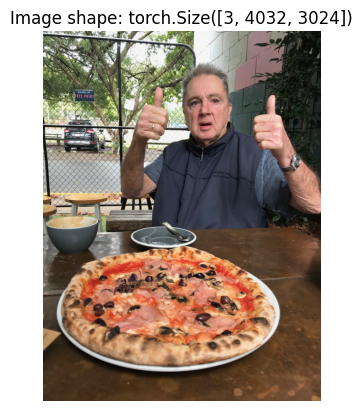

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


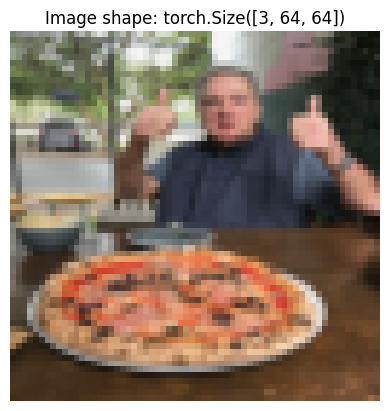

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image_transformed.shape}")
plt.axis(False);

In [ ]:
model2.eval()

with torch.inference_mode():
  custom_image_pred = model2(custom_image_transformed)

RuntimeError: Expected all tensors to be on the same device, but got weight is on cuda:0, different from other tensors on cpu (when checking argument in method wrapper_CUDA___slow_conv2d_forward)

In [ ]:
model2.eval()

with torch.inference_mode():
  custom_image_pred = model2(custom_image_transformed.to(device))

ValueError: expected 4D input (got 3D input)

In [ ]:
model2.eval()

with torch.inference_mode():
  custom_img_with_shape_4D_batch_size = custom_image_transformed.unsqueeze(dim=0)

  custom_image_pred = model2(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

tensor([[ 0.0764, -0.1133, -0.1407]], device='cuda:0')

In [ ]:
print(f"Prediction logits: {custom_image_pred}")

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.0764, -0.1133, -0.1407]], device='cuda:0')
Prediction probabilities: tensor([[0.3799, 0.3143, 0.3058]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [ ]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()]
custom_image_pred_class

'pizza'

In [ ]:
custom_image_pred_class = class_names[custom_image_pred_label]
custom_image_pred_class

'pizza'

# PyTorch Image Classification — Explained (works on Google Colab + GitHub `README.md`)

> A single-file, readable guide + runnable snippets that walk through: data preparation, visualization, transforms, `ImageFolder`, `DataLoader`, model design (TinyVGG variants), training loop, evaluation, and inference. Focus is on **why** things are done a certain way (especially how PyTorch expects data) so you understand the details behind the code.

---

## Table of Contents

1. [Quick start (Colab)](#quick-start-colab)
2. [Project structure & dataset layout](#project-structure--dataset-layout)
3. [Data preparation (why each step)](#data-preparation-why-each-step)
4. [Visualization (why look at images first)](#visualization-why-look-at-images-first)
5. [Transforms and `ToTensor()` (what PyTorch expects)](#transforms-and-totensor-what-pytorch-expects)
6. [`ImageFolder` and class indexing: how class names are inferred](#imagefolder-and-class-indexing-how-class-names-are-inferred)
7. `[DataLoader` and batching: parameters that matter (why `batch_size`, `num_workers`, `shuffle`)](#dataloader-and-batching-parameters-that-matter)
8. [Model design: TinyVGG family (shape tracking & reasoning)](#model-design-tinyvgg-family-shape-tracking--reasoning)
9. [Training & test loops: the why behind each line](#training--test-loops-the-why-behind-each-line)
10. [Inference & serving tips (single image -> batch)](#inference--serving-tips-single-image---batch)
11. [Practical tips, debugging checklist, and gotchas](#practical-tips-debugging-checklist-and-gotchas)
12. [Full runnable Colab-ready code snippets (copy-paste)](#full-runnable-colab-ready-code-snippets-copy-paste)

---

## Quick start (Colab)

1. Upload `pizza_steak_sushi.zip` to `/content` (Colab root) or mount your Google Drive.
2. Open a new Colab notebook, install dependencies if needed (torch, torchvision, torchinfo).
3. Copy the `Data preparation` -> `Model` -> `Train` cells in order. The snippets in the bottom of this README are ready-to-run.

**Colab-specific notes**:

* On Colab, set `NUM_WORKERS = 2` or `0` to avoid issues (Colab's environment sometimes has trouble with many workers).
* Use smaller `BATCH_SIZE` if GPU memory is limited.

---

## Project structure & dataset layout

PyTorch's `torchvision.datasets.ImageFolder` expects a directory layout like this:

```
data/
└── pizza_steak_sushi_images/
    ├── train/
    │   ├── pizza/       # all pizza images
    │   ├── steak/       # all steak images
    │   └── sushi/       # all sushi images
    └── test/
        ├── pizza/
        ├── steak/
        └── sushi/
```

Why this layout? `ImageFolder` maps folder names to class labels automatically — the folder name *is* the class name. It expects samples to be organized per-class in subfolders. This saves you from writing custom label files and is a very convenient format for typical classification tasks.

---

## Data preparation (why each step)

```py
import zipfile
from pathlib import Path

data_path = Path("data/")
zip_path = Path("/content/pizza_steak_sushi.zip")
image_path = data_path / "pizza_steak_sushi_images"

# create folder and extract only if missing — idempotent operations are good for notebooks
auto_extract = True
```

Why check `is_dir()` and make creation idempotent?

* Notebooks are re-run; you don't want to re-extract or overwrite accidentally.
* Idempotence (run many times, same state) is useful for reproducibility.

Why use `Path` instead of raw strings?

* `Path` gives OS-independent utilities, clearer path joining (`/`), and readable code.

---

## Visualization (why look at images first)

```
from PIL import Image
import matplotlib.pyplot as plt

# random sample & display
```

Why visualize?

* Confirm the dataset is correct (no mislabelled or corrupted files).
* Validate aspect ratios and sizes (helps choose resize/crop strategy).
* Spot dataset bias (e.g., backgrounds correlated with classes).

Always inspect a few images before training — you may spot problems that harm training (e.g., PNG with alpha channel, grayscale images, or extreme aspect ratios).

---

## Transforms and `ToTensor()` (what PyTorch expects)

Key points:

* PyTorch models expect tensors shaped `(C, H, W)` (channel-first). `PIL Image` is `(H, W, C)`.
* `transforms.ToTensor()` converts a `PIL.Image` or `numpy.ndarray` to a `torch.FloatTensor` and **scales pixel values from `[0,255]` to `[0.0, 1.0]`**.
* Most pretrained models expect inputs normalized to mean/std of ImageNet. If you're training from scratch, normalizing can still stabilize training.

Example transform pipeline:

```py
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize((64, 64)),          # consistent input size
    transforms.RandomHorizontalFlip(0.5), # augmentation during training
    transforms.ToTensor(),                # -> tensor float in [0, 1]
    # transforms.Normalize(mean, std)    # optional but often beneficial
])
```

Why resizing to `(64, 64)`?

* Keeps model small and fast for educational datasets.
* Ensures fixed-size tensor for the `nn.Linear` layer that follows the convs.
* If you change input size, recompute shapes in the model design.

Why augmentation (`RandomHorizontalFlip`, `TrivialAugmentWide`, etc.)?

* Data augmentation synthetically increases dataset variability, improving generalization.
* Choose augmentation carefully — e.g. flipping an image of digits might change its meaning.

**Important:** `ToTensor()` followed by a `Normalize` is a common pattern. `Normalize` expects tensors in `[0,1]`.

---

## `ImageFolder` and class indexing: how class names are inferred

```py
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
```

What `ImageFolder` does under the hood:

* Walks `root/` and finds subfolders. Each subfolder name becomes a class label.
* Sorts class folder names alphabetically and assigns numeric labels starting at 0.

  * Example: `['pizza', 'steak', 'sushi']` → `{ 'pizza': 0, 'steak': 1, 'sushi': 2 }`
* Provides attributes to inspect:

  * `train_data.classes` → list of class names in index order
  * `train_data.class_to_idx` → mapping `{class_name: index}`
  * each `train_data[i]` returns `(image_tensor, label_index)`

Why does it infer from folder names? It's a common organizational pattern for image datasets (ImageNet, CIFAR variants, etc.). This reduces boilerplate label files and mapping logic.

**Pro tip:** If you want a custom label mapping, either rename folders or provide a custom dataset wrapper.

---

## `DataLoader` and batching: parameters that matter

```py
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
```

Parameters and why they matter:

* `batch_size`:

  * Controls how many samples are processed before the model updates weights.
  * Larger batch sizes provide more stable gradient estimates but require more memory.
  * For small datasets, smaller batches (8–64) are common.

* `shuffle=True` (for training):

  * Shuffles dataset indices each epoch, preventing the model from learning order artifacts.
  * For validation/test, use `shuffle=False` so metrics are stable and reproducible.

* `num_workers`:

  * Spawns that many subprocesses to load data in parallel.
  * CPU-bound; helps overlap data loading with GPU computation.
  * On Colab, `num_workers=0` or `2` is safe. On powerful servers, `num_workers=os.cpu_count()` often speeds things up.

* `pin_memory=True` (often used when using GPU):

  * If `pin_memory=True`, DataLoader will copy tensors into page-locked memory, which can accelerate transfer to GPU via `cuda()`.

* `drop_last`:

  * If `True`, drops the last incomplete batch; sometimes useful for batchnorm stability or distributed training.

**Batch shapes**

* If a single image tensor is `(3, H, W)`, a batch of `N` images has shape `(N, 3, H, W)`.
* Labels are batched as `(N,)` or `(N, 1)` depending on collate. For classification, `(N,)` is typical.

**Why shuffle + batch?**

* Shuffling prevents correlated gradients across batches.
* Batching gives stable gradients and better GPU utilization.

---

## Model design: TinyVGG family (shape tracking & reasoning)

Key ideas used in the provided TinyVGG models:

* `Conv2d` with `padding=1` and `kernel_size=3` keeps spatial size when `stride=1`.
* `MaxPool2d(2)` halves the spatial dimensions.
* After two 2×2 pools, `H` & `W` are divided by 4 (64 → 32 → 16).
* Flattening feature maps converts `(N, C, H, W)` to `(N, C*H*W)` for a `Linear` layer.

**Why `AdaptiveAvgPool2d((1,1))` in model2?**

* It reduces each channel to a single value regardless of spatial size — makes the classifier independent of the input spatial resolution and reduces parameters.

**Why BatchNorm?**

* Stabilizes and speeds up training by normalizing feature maps per-batch.

**Why dropout?**

* Regularization technique to reduce overfitting by randomly zeroing neuron outputs during training.

**Shape-tracking example**

* Input: `(N, 3, 64, 64)`
* After conv_block1 + pool: `(N, F, 32, 32)`
* After conv_block2 + pool: `(N, F, 16, 16)`
* Flatten → `(N, F*16*16)` → Linear → `(N, num_classes)`

If you change input sizes or architectures, recompute the flattened size (or use `AdaptiveAvgPool2d`).

---

## Training & test loops: the why behind each line

**`train_step`**

```py
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0

    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        optimizer.zero_grad()   # clear previous gradients (important!)
        loss.backward()         # compute gradients
        optimizer.step()        # update weights

        preds = torch.argmax(y_pred, dim=1)
        train_acc += (preds == y).sum().item() / len(y)
        train_loss += loss.item()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc
```

Why each line?

* `model.train()` toggles training-specific layers (Dropout, BatchNorm) to training mode.
* `optimizer.zero_grad()` must be called **before** `loss.backward()` in iterative loops — otherwise gradients accumulate.
* `loss.backward()` computes gradients using autograd.
* `optimizer.step()` applies the computed gradients.
* We compute `preds` and `train_acc` batch-wise to track performance.
* Averaging loss/acc over `len(dataloader)` makes metrics comparable across runs.

**`test_step`**

* Put the model in `eval()` and wrap inference with `torch.no_grad()` (or `torch.inference_mode()`): avoids saving activations for backprop — uses less memory and is faster.
* Don't call `optimizer` methods in test.

**Why `torch.inference_mode()` vs `torch.no_grad()`?**

* `inference_mode()` is slightly more optimized for inference-only workflows (introduced in recent PyTorch versions), but `no_grad()` is widely used and sufficient.

**Metric computation**

* Use `torch.argmax` on logits to obtain predicted classes for `CrossEntropyLoss` outputs.
* Keep metrics as floats for plotting.

---

## Inference & serving tips (single image -> batch)

PyTorch models expect batched inputs. If you load a single image and get shape `(3, H, W)`:

* Use `unsqueeze(0)` to add a batch dimension: `(1, 3, H, W)`.
* Move to device with `.to(device)`.

Normalization & dtype:

* If the model was trained with `ToTensor()` only (i.e. in `[0,1]`), the inference image must be scaled the same way.
* If you use `Normalize(...)` during training, apply the same normalization during inference.
* Use float tensors for the model. Convert `uint8` to float and divide by 255 if needed.

Example sequence:

```py
img = torchvision.io.read_image(str(path))      # CHW, uint8 [0,255]
img = img.float() / 255.0                      # convert to float and scale
img = transforms.Resize((64,64))(img)          # resize
img = img.unsqueeze(0).to(device)              # add batch dim & send to device
with torch.inference_mode():
    logits = model(img)
    probs = torch.softmax(logits, dim=1)
    pred = torch.argmax(probs, dim=1).item()
```

---

## Practical tips, debugging checklist, and gotchas

* **Shape mismatches**: track shapes using `print(tensor.shape)` or `torchinfo.summary()`.
* **Channel order**: PIL↔NumPy↔matplotlib use HWC, PyTorch uses CHW. Use `.permute(1,2,0)` to visualize.
* **Data type**: `ToTensor()` returns `float32` in [0,1] — avoid passing `uint8` directly to `model`.
* **Normalization mismatch**: If training uses `Normalize`, inference must too.
* **Small dataset**: model can overfit quickly — use augmentation and regularization.
* **`num_workers` issues on Windows/Colab**: If you hit multiprocessing errors, set `num_workers=0`.
* **Determinism**: For reproducible runs, set seeds for `random`, `numpy`, `torch`, and set `torch.backends.cudnn.deterministic=True`.

---

## Full runnable Colab-ready code snippets (copy-paste)

*Note: These are the condensed runnable snippets. They assume you already extracted the zip into `/content/data/pizza_steak_sushi_images/` with `train/` and `test/` folders.*

```py
# 1) Installs (if Colab doesn't have required libs)
!pip install -q torch torchvision torchinfo

# 2) Imports + paths
from pathlib import Path
import random
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

DATA_DIR = Path('data/pizza_steak_sushi_images')
train_dir = DATA_DIR / 'train'
test_dir = DATA_DIR / 'test'

# 3) Transforms
train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

# 4) ImageFolder
train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_data  = datasets.ImageFolder(root=test_dir, transform=test_transform)
print('classes:', train_data.classes)

# 5) DataLoader (Colab-friendly defaults)
BATCH_SIZE = 32
NUM_WORKERS = 2
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

# 6) TinyVGG model (simple)
class TinyVGG(nn.Module):
    def __init__(self, in_channels, hidden_units, num_classes):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, num_classes)
        )
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TinyVGG(in_channels=3, hidden_units=16, num_classes=len(train_data.classes)).to(device)

# 7) Training utilities (train_step/test_step/train)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# small wrapper functions: train_step / test_step and a train loop — copy the ones from above in the notebook
```

---

## Want this as a `README.md` in your repo?

I placed a full `README.md` into the canvas for you (this file). You can copy it into your repo root. If you want, I can also:

* Add a `requirements.txt` or `environment.yml` for reproducible installs.
* Produce a shorter `README` and a longer `docs/` folder with expanded tutorials and checkpoints.

---

If you'd like, I can now:

* Add a code block that saves & loads model weights (`torch.save` / `torch.load`),
* Add more advanced data handling examples (custom `Dataset` that reads CSV labels), or
* Create a minimal GitHub Actions workflow to run a smoke test on push.

Tell me which of those you'd like next.
